### Visualização de Dados em Python

#### Importando dataset de imigração do Canadá entre 1980-2013

In [52]:
import pandas as pd

df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

df_can.set_index('Country', inplace=True)
df_can.head(3)

years = list(map(str, range(1980, 2014)))
years

Data read into a pandas dataframe!


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
mpl.style.use(['ggplot']) #seleciona estilo dos gráficos semelhante ao do ggplot

In [19]:
%matplotlib inline

In [20]:
import seaborn as sns

#### 1.  Gráfico de Linha Padrão


O gráfico mais simples e fundamental é o gráfico de linha padrão. A função espera dois arrays como entrada, x e y, ambos do mesmo tamanho. x é tratado como uma variável independente e y como a dependente. O gráfico é plotado como segmentos de linha mais curtos conectando os pares de pontos x,y ordenados em termos da variável x.

Exemplo:

<Axes: >

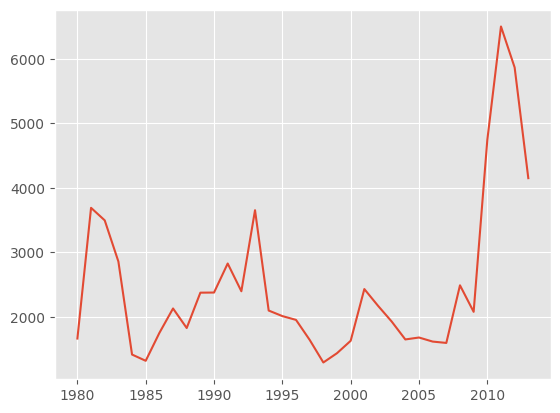

In [21]:
# Selecionando dados do Haiti entre 1980-2013 (excluindo a coluna 'total')
haiti = df_can.loc['Haiti', years]
haiti.head()

haiti.plot()

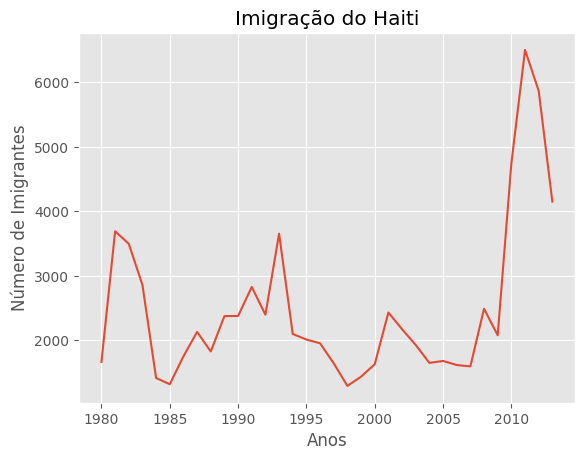

In [22]:
haiti.plot(kind='line')

plt.title('Imigração do Haiti')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

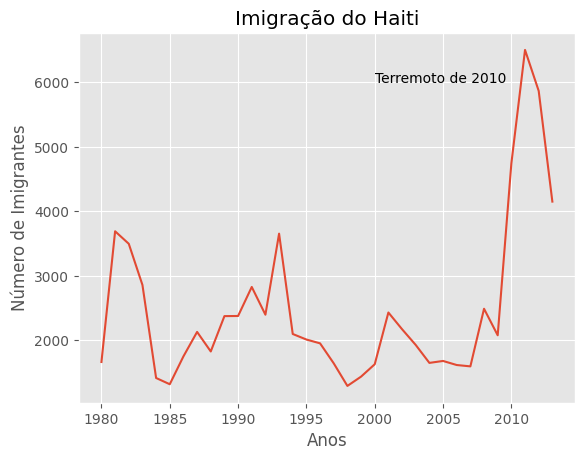

In [23]:
# Convertendo o índice para inteiro para melhor visualização
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Imigração do Haiti')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

# Anotando o terremoto de 2010
# Sintaxe: plt.text(x, y, texto)
plt.text(2000, 6000, 'Terremoto de 2010') # adiciona texto nas coordenadas (2000, 6000)

plt.show() 

# Se os anos fossem armazenados como 'string', precisaríamos especificar x como a posição do índice do ano.
# Ex: índice 20 é o ano 2000, já que é o 20º ano com ano base de 1980.
# plt.text(20, 6000, 'Terremoto de 2010') # anos armazenados como int

#### 2. Gráfico de Área

##### O que é um Gráfico de Área?

Um **gráfico de área** (Area Plot) é uma extensão do gráfico de linha que preenche a área entre o eixo X e a linha com cor. É especialmente útil para:

- **Visualizar tendências ao longo do tempo**: Mostra como valores mudam continuamente
- **Comparar múltiplas séries**: Quando empilhados, permitem ver a contribuição de cada categoria para o total
- **Destacar magnitude**: O preenchimento de cor enfatiza o volume ou quantidade dos dados

**Tipos de gráficos de área:**
| Tipo | Descrição |
|------|-----------|
| **Empilhado** (`stacked=True`) | As séries são empilhadas uma sobre a outra, mostrando o total cumulativo |
| **Não empilhado** (`stacked=False`) | Cada série é plotada independentemente, podendo haver sobreposição |

**Parâmetros importantes:**
- `alpha`: Controla a transparência (0 = totalmente transparente, 1 = totalmente opaco)
- `stacked`: Define se as áreas serão empilhadas ou sobrepostas
- `figsize`: Define o tamanho do gráfico (largura, altura)

> ⚠️ **Nota:** Por padrão, gráficos de área são empilhados. Para criar um gráfico não empilhado, defina o parâmetro `stacked=False`. Cada coluna deve conter apenas valores positivos ou apenas valores negativos (valores NaN são tratados como 0).

In [24]:
# Ordenando os países por total de imigrantes (decrescente)
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# Selecionando os 5 países com mais imigrantes
df_top5 = df_can.head()

# Transpondo a tabela para mostrar os anos como eixo x
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


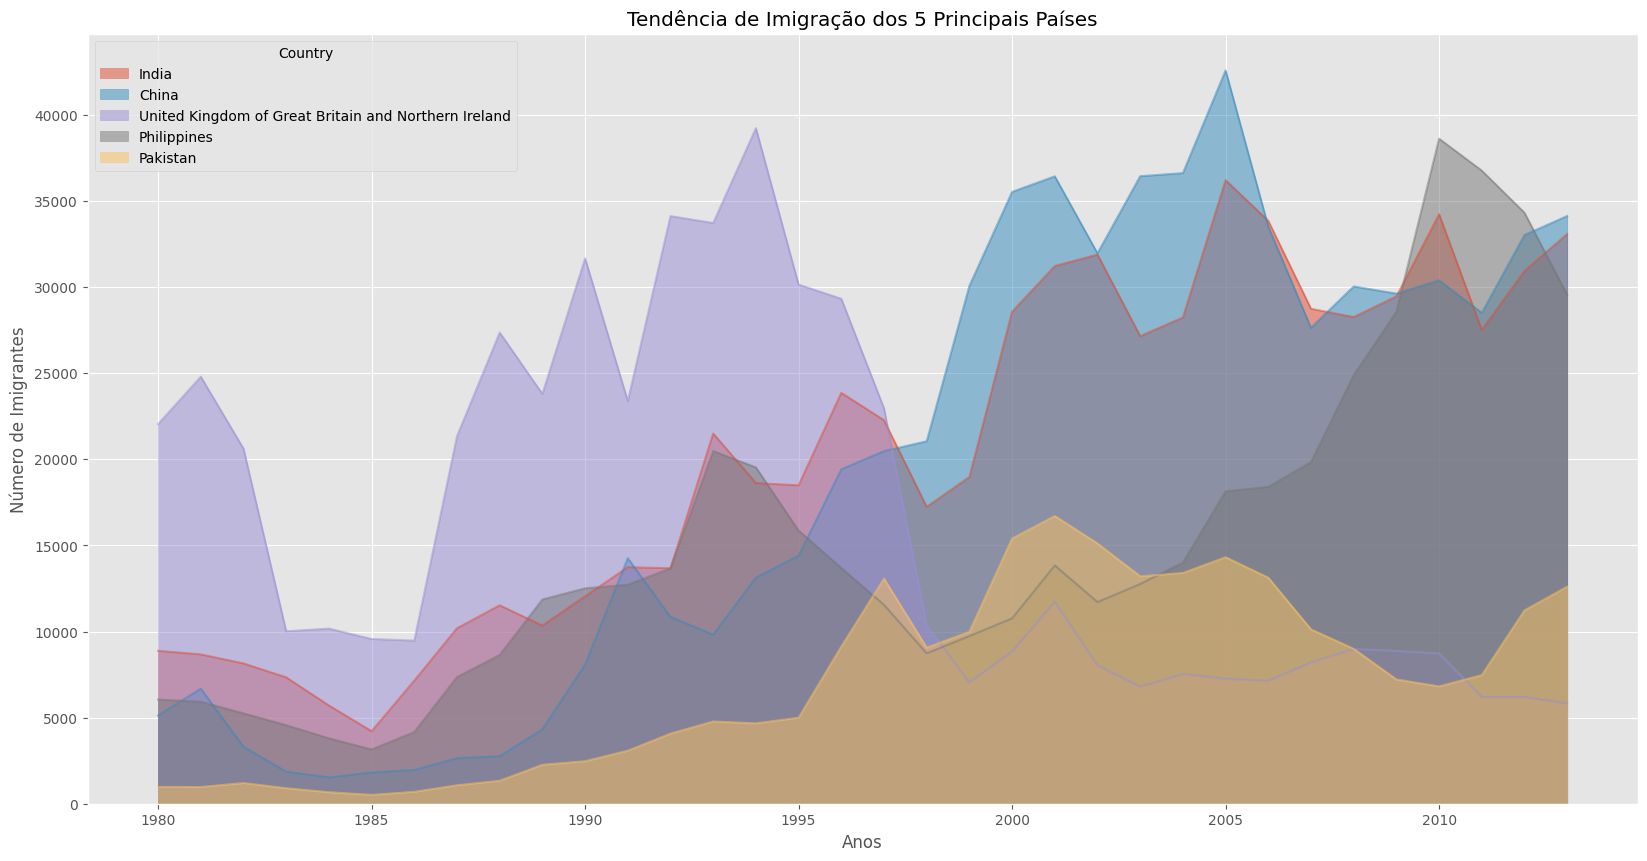

In [25]:
# Convertendo o índice para inteiro para melhor visualização no eixo X
df_top5.index = df_top5.index.map(int)

# Criando gráfico de área NÃO empilhado
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))

plt.title('Tendência de Imigração dos 5 Principais Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

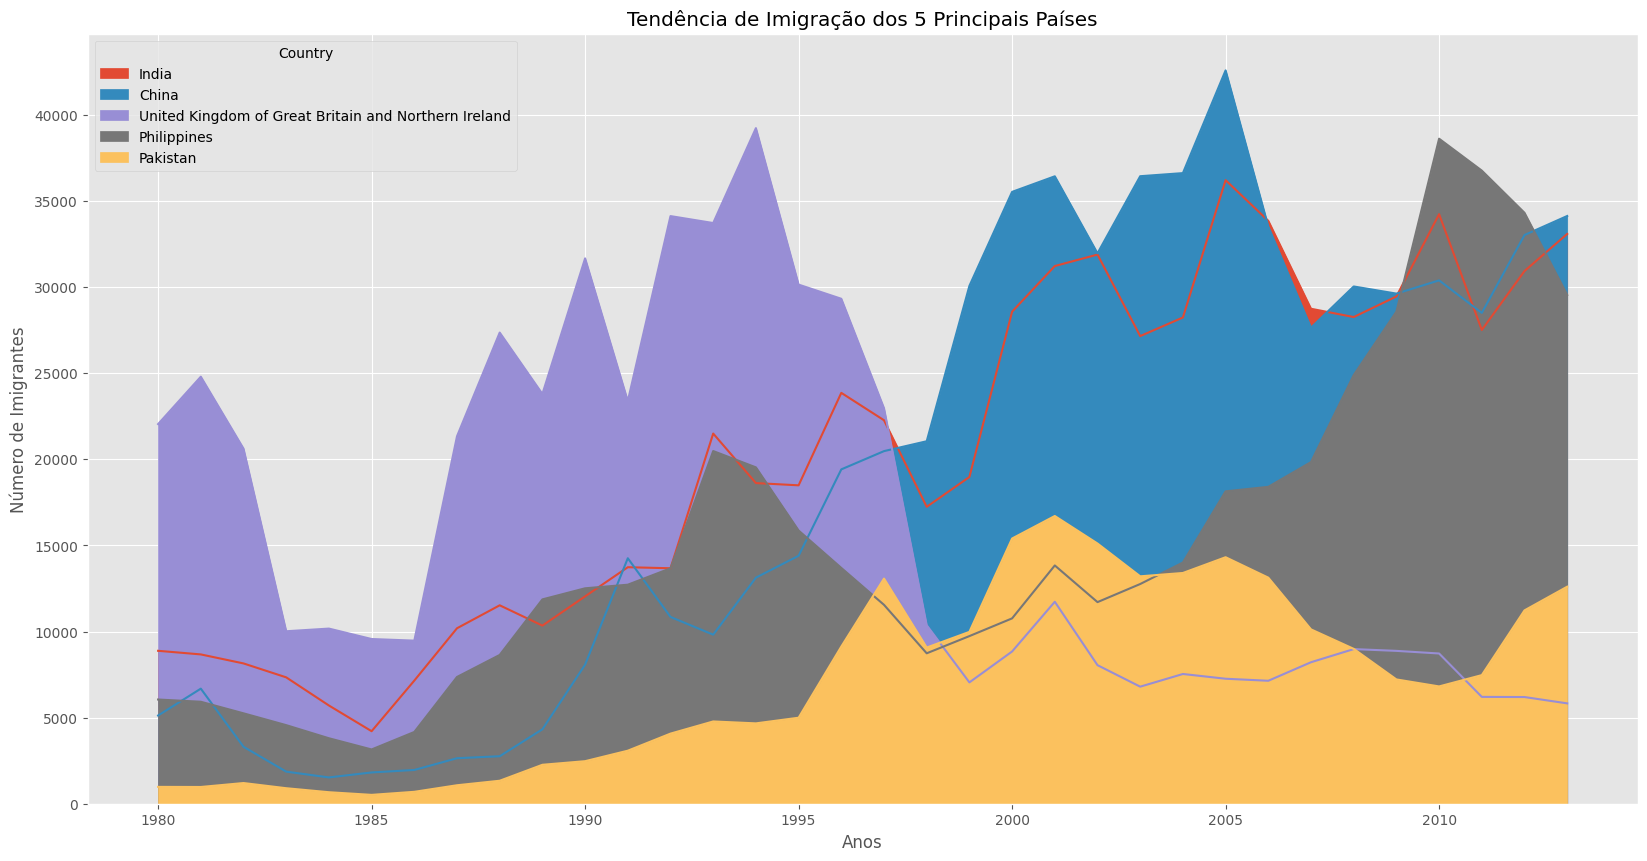

In [26]:
# Gráfico de área com transparência total (alpha=1)
df_top5.plot(kind='area', 
             alpha=1,  # 0 - 1, valor padrão alpha = 0.5
             stacked=False, # muda o gráfico para que cada elemento possa ficar ou não em cima do outro
             figsize=(20, 10))

plt.title('Tendência de Imigração dos 5 Principais Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

##### Opção 2: Camada de Artista (Método Orientado a Objetos) - usando uma instância Axes do Matplotlib (preferido)

Você pode usar uma instância `Axes` do seu gráfico atual e armazená-la em uma variável (ex: `ax`). Você pode adicionar mais elementos chamando métodos com uma pequena mudança na sintaxe (adicionando `set_` aos métodos anteriores). Por exemplo:

| Método Scripting | Método Orientado a Objetos |
|-----------------|---------------------------|
| `plt.title()` | `ax.set_title()` |
| `plt.xlabel()` | `ax.set_xlabel()` |
| `plt.ylabel()` | `ax.set_ylabel()` |

Esta opção às vezes é mais transparente e flexível para gráficos avançados (especialmente quando há múltiplos gráficos, como você verá mais adiante).

Neste curso, usaremos principalmente a camada de scripting, exceto para algumas visualizações avançadas onde precisaremos usar a camada de artista para manipular aspectos avançados dos gráficos.

Text(0.5, 0, 'Anos')

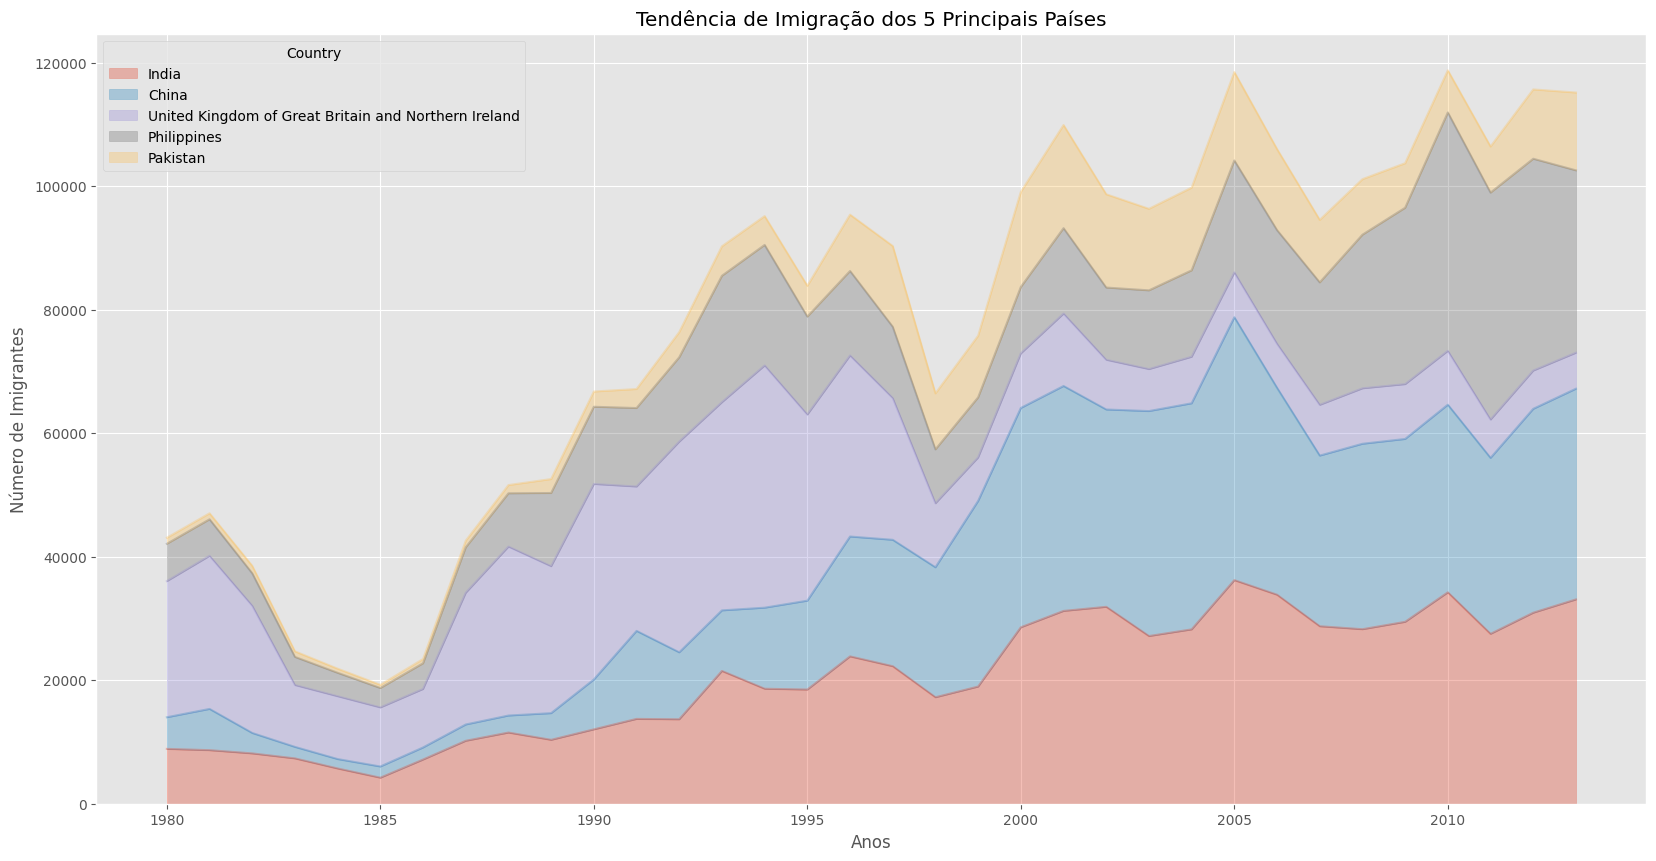

In [27]:
# Opção 2: opção preferida com mais flexibilidade
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Tendência de Imigração dos 5 Principais Países')
ax.set_ylabel('Número de Imigrantes')
ax.set_xlabel('Anos')

#### 3. Histograma

Um histograma é uma representação visual importante de dados em forma categórica. Para visualizar os dados em uma forma "agrupada em intervalos", podemos usar o gráfico de histograma com um número de intervalos (bins) necessários ou mesmo com os pontos de dados que marcam as bordas dos intervalos. O eixo x representa os intervalos de dados, e o eixo y representa o número de elementos em cada um dos intervalos.

Exemplo de código de histograma:

In [28]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [29]:
import numpy as np

# Calculando frequência e bordas dos intervalos
count, bin_edges = np.histogram(df_can['2013'])

print(count) # contagem de frequência
print(bin_edges) # limites dos intervalos, padrão = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


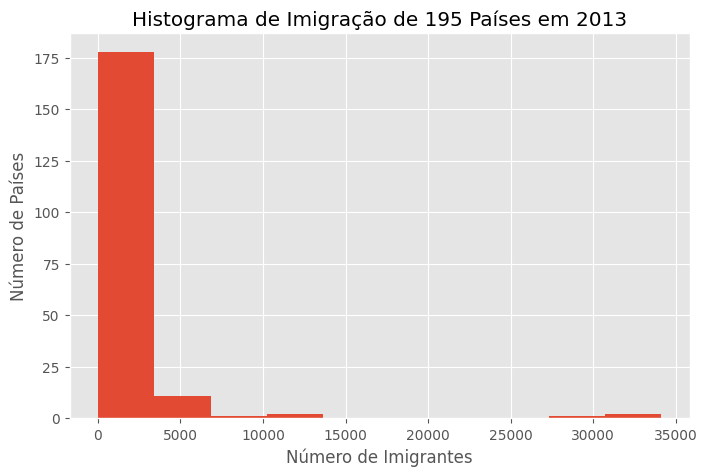

In [30]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histograma de Imigração de 195 Países em 2013')
plt.ylabel('Número de Países')
plt.xlabel('Número de Imigrantes')

plt.show()

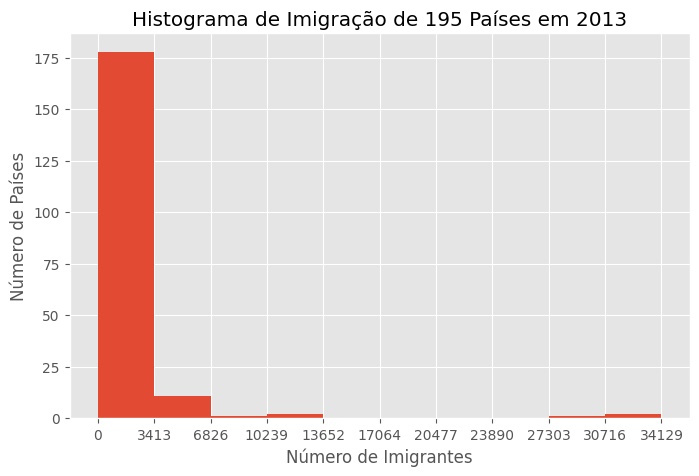

In [31]:
# Calculando valores para os ticks do eixo x
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histograma de Imigração de 195 Países em 2013')
plt.ylabel('Número de Países')
plt.xlabel('Número de Imigrantes')

plt.show()

**Pergunta:** Qual é a distribuição de imigração para Dinamarca, Noruega e Suécia entre 1980 e 2013?

In [32]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

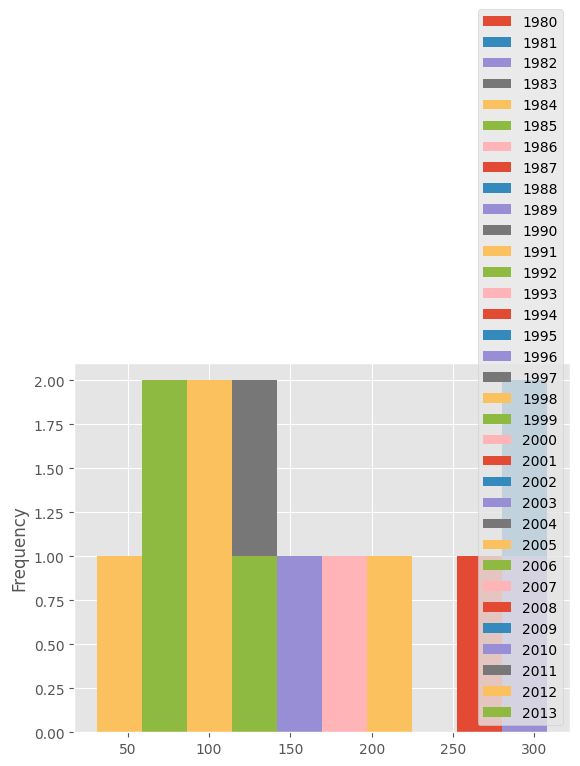

In [33]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Não se preocupe, você frequentemente encontrará situações como esta ao criar gráficos. A solução geralmente está em como o dataset está estruturado.

Em vez de plotar a distribuição de frequência populacional dos 3 países, o pandas plotou a distribuição de frequência para os anos.

Isso pode ser facilmente corrigido **transpondo** primeiro o dataset, e então plotando como mostrado abaixo.

In [34]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


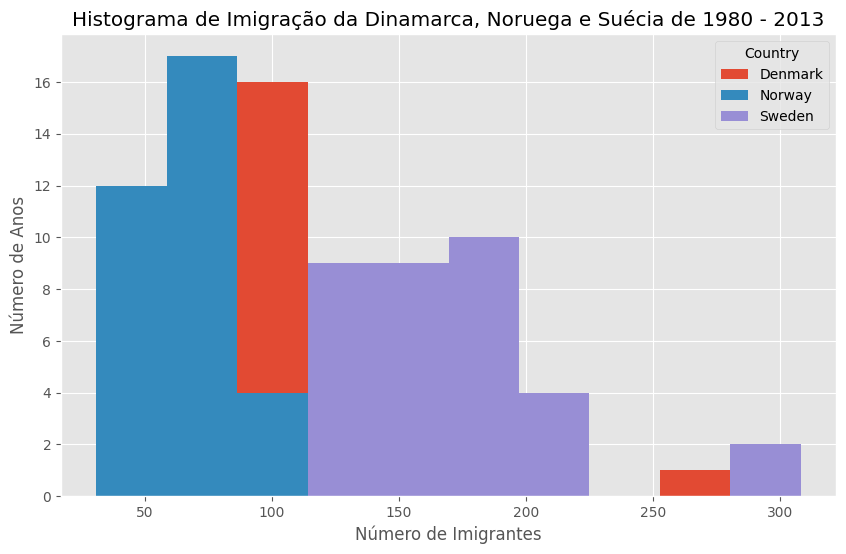

In [35]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histograma de Imigração da Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Número de Anos')
plt.xlabel('Número de Imigrantes')

plt.show()

Vamos fazer algumas modificações para melhorar o impacto e a estética do gráfico anterior:

* Aumentar o tamanho do bin para 15 passando o parâmetro `bins`
* Definir transparência para 60% passando o parâmetro `alpha`
* Rotular o eixo x passando o parâmetro `xlabel`
* Mudar as cores dos gráficos passando o parâmetro `color`

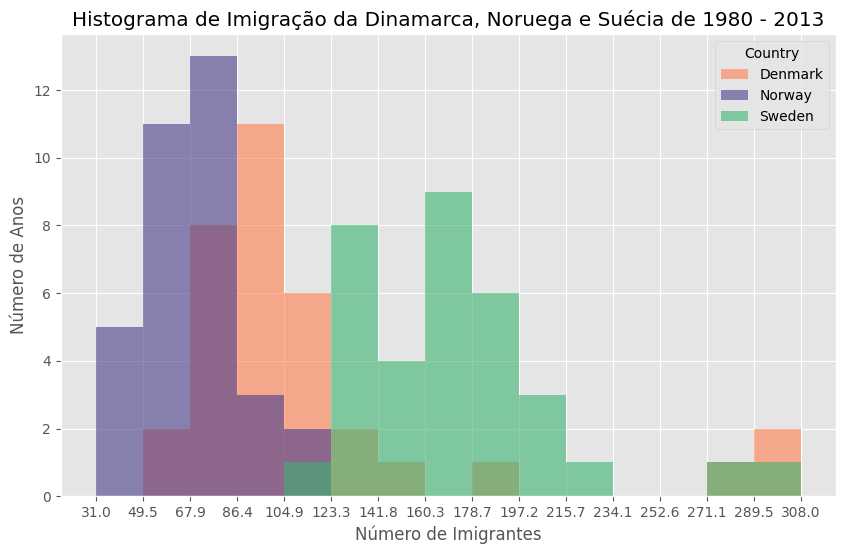

In [36]:
# Calculando valores para os ticks do eixo x
count, bin_edges = np.histogram(df_t, 15)

# Histograma não empilhado
df_t.plot(kind='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histograma de Imigração da Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Número de Anos')
plt.xlabel('Número de Imigrantes')

plt.show()

#### 4. Gráfico de Barras



Um gráfico de barras é usado para visualizar dados categóricos. O eixo y representa o valor médio dos pontos de dados pertencentes a uma categoria específica, enquanto o eixo x representa o número de elementos nas diferentes categorias.

Exemplo de código de Bar Charts:

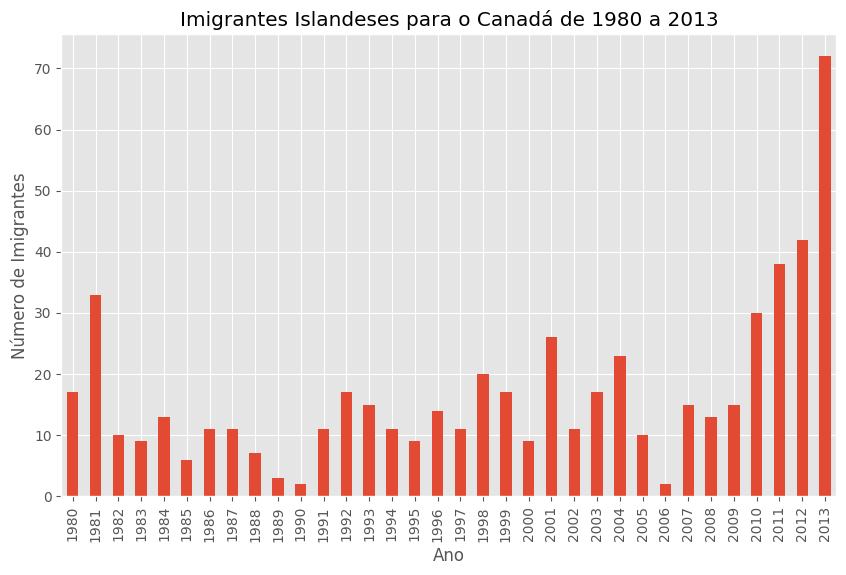

In [37]:
# Selecionando dados da Islândia
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.title('Imigrantes Islandeses para o Canadá de 1980 a 2013')

plt.show()

O gráfico de barras acima mostra o número total de imigrantes dividido por ano. Podemos ver claramente o impacto da crise financeira: o número de imigrantes para o Canadá começou a aumentar rapidamente após 2008.

Vamos anotar isso no gráfico usando o método `annotate` da camada de scripting ou da interface pyplot. Passaremos os seguintes parâmetros:

| Parâmetro | Descrição |
|-----------|-----------|
| `s` | O texto da anotação |
| `xy` | Tupla especificando o ponto (x,y) a ser anotado (neste caso, ponta da seta) |
| `xytext` | Tupla especificando o ponto (x,y) para colocar o texto (neste caso, início da seta) |
| `xycoords` | Sistema de coordenadas - 'data' usa o sistema do objeto sendo anotado (padrão) |
| `arrowprops` | Dicionário de propriedades para desenhar a seta |

**Propriedades da seta (`arrowprops`):**
- `arrowstyle`: Especifica o estilo da seta, `->` é a seta padrão
- `connectionstyle`: Especifica o tipo de conexão. `arc3` é uma linha reta
- `color`: Especifica a cor da seta
- `lw`: Especifica a largura da linha

Vamos também adicionar um texto para acompanhar a seta. Passaremos os seguintes parâmetros adicionais:

| Parâmetro | Descrição |
|-----------|-----------|
| `rotation` | Ângulo de rotação do texto em graus (sentido anti-horário) |
| `va` | Alinhamento vertical do texto: `'center'`, `'top'`, `'bottom'`, `'baseline'` |
| `ha` | Alinhamento horizontal do texto: `'center'`, `'right'`, `'left'` |

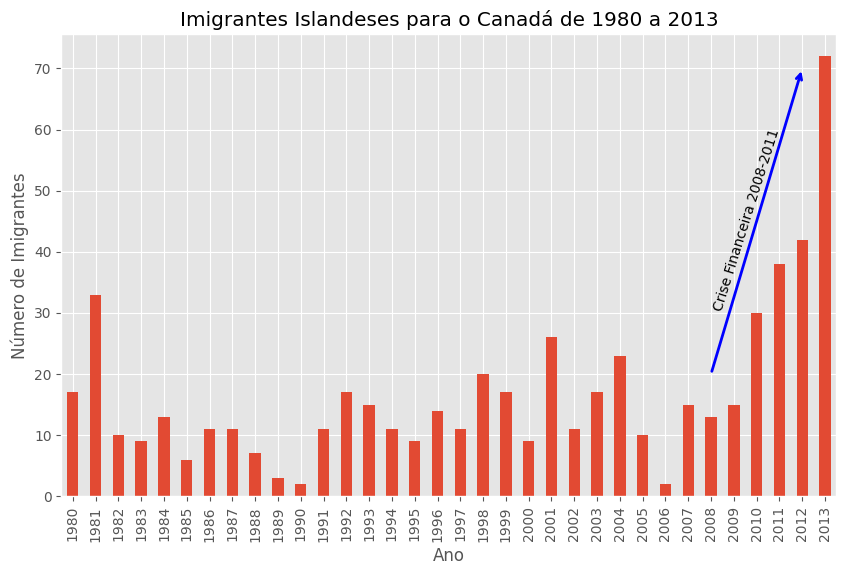

In [38]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # kind='barh' faz um gráfico de barras na HORIZONTAL

plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.title('Imigrantes Islandeses para o Canadá de 1980 a 2013')

# Anotando a seta
plt.annotate('',  # texto vazio para não mostrar texto na ponta
             xy=(32, 70),  # ponta da seta no ponto (ano 2012, pop 70)
             xytext=(28, 20),  # base da seta no ponto (ano 2008, pop 20)
             xycoords='data',  # usa o sistema de coordenadas do objeto
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Anotando o texto
plt.annotate('Crise Financeira 2008-2011',  # texto a ser exibido
             xy=(28, 30),  # posição do texto no ponto (ano 2008, pop 30)
             rotation=72.5,  # ajustado para combinar com a seta
             va='bottom',  # alinhamento vertical na parte inferior
             ha='left',  # alinhamento horizontal à esquerda
             )

plt.show()

#### 5. Gráfico de Torta (Pie Charts)

Um **gráfico de torta** (pie chart) é um gráfico circular que exibe proporções numéricas dividindo um círculo (ou torta) em fatias proporcionais. Você provavelmente já está familiarizado com gráficos de torta, pois são amplamente usados em negócios e mídia.

Podemos criar gráficos de torta no Matplotlib passando o parâmetro `kind='pie'`.

In [39]:
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_continents))
df_continents.head()

<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_231429/660074559.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('Continent', axis=0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaNorthern AfricaNorthern AfricaE...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaEastern AsiaSouth-Eastern AsiaSou...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Northern EuropeEastern EuropeWestern EuropeEas...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanCaribbeanSouth AmericaSouth AmericaCe...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


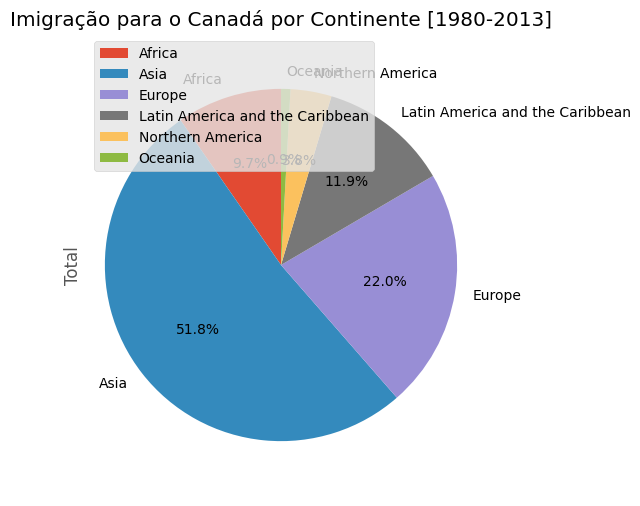

In [40]:
df_continents['Total'].plot(kind='pie',
                             figsize=(5, 6), 
                             autopct='%1.1f%%',  # formato da porcentagem
                             startangle=90,      # ângulo onde começa a primeira fatia
                             shadow=False)

plt.title('Imigração para o Canadá por Continente [1980-2013]')
plt.axis('equal')  # garante que o gráfico seja circular
plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

Adicionando algumas modificações, podemos deixar o gráfico mais 'clean':

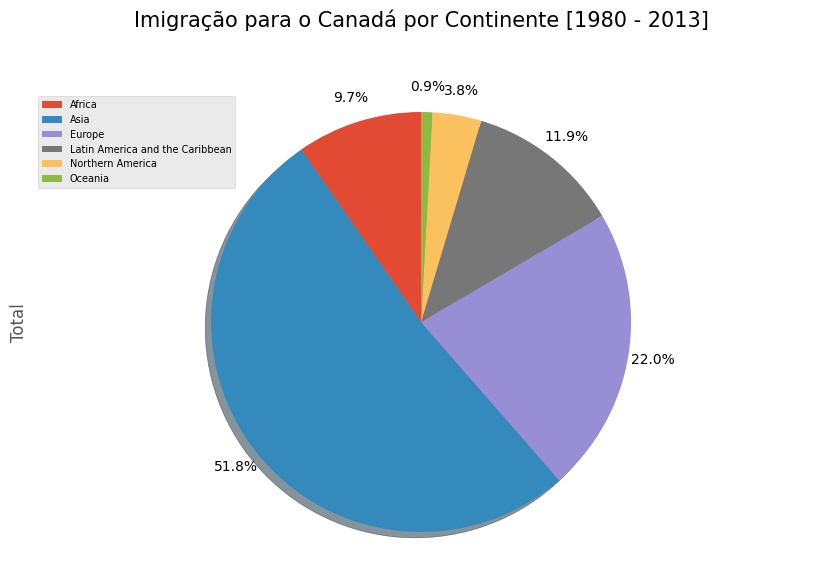

In [41]:
# Cores personalizadas e lista de "explosão"
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]  # proporção de deslocamento para cada continente

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # desativa rótulos no gráfico
                            pctdistance=1.12,    # distância da porcentagem em relação ao centro
                            # colors=colors_list,  # adiciona cores personalizadas
                            # explode=explode_list # 'explode' os 3 menores continentes
                            )

# Escala o título em 12% para combinar com pctdistance
plt.title('Imigração para o Canadá por Continente [1980 - 2013]', y=1.12, fontsize=15) 

plt.axis('equal') 

# Adiciona legenda
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

#### 6. Gráfico de Caixa (Box Plots)

Um **gráfico de caixa** (box plot) é uma forma de representar estatisticamente a distribuição dos dados através de cinco dimensões principais:

| Dimensão | Descrição |
|----------|-----------|
| **Mínimo** | O menor número no dataset, excluindo outliers |
| **Primeiro quartil (Q1)** | Número médio entre o mínimo e a mediana |
| **Segundo quartil (Mediana)** | Número do meio do dataset (ordenado) |
| **Terceiro quartil (Q3)** | Número médio entre a mediana e o máximo |
| **Máximo** | O maior número no dataset, excluindo outliers |

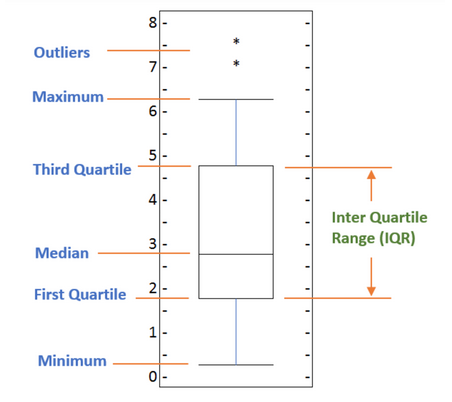

In [42]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


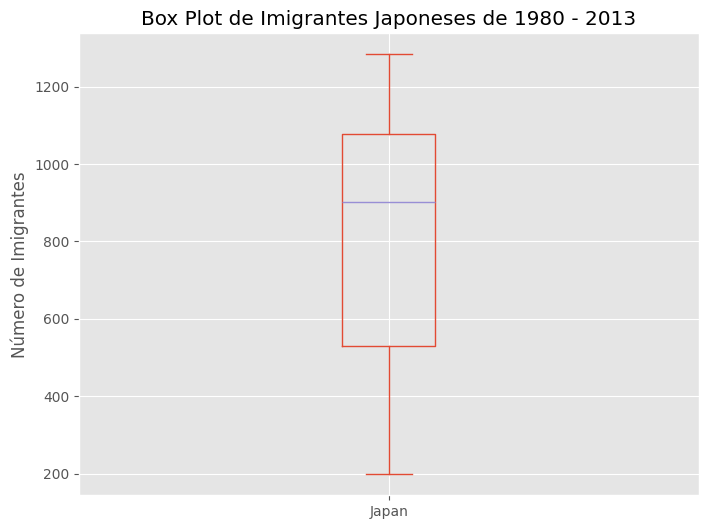

In [43]:
df_japan.plot(kind='box', figsize=(8, 6))  # para deixar na horizontal, adicionar vert=False

plt.title('Box Plot de Imigrantes Japoneses de 1980 - 2013')
plt.ylabel('Número de Imigrantes')

plt.show()

#### 7. Gráfico de Dispersão (Scatter Plots)

Gráficos de dispersão são gráficos que apresentam a relação entre duas variáveis em um conjunto de dados. Eles representam pontos de dados em um plano bidimensional. A variável ou atributo independente é plotado no eixo X, enquanto a variável dependente é plotada no eixo Y.

Gráficos de dispersão são usados em qualquer uma das seguintes situações:

* Quando temos dados numéricos emparelhados
* Quando há múltiplos valores da variável dependente para um único valor de uma variável independente
* Para determinar a relação entre variáveis em alguns cenários

In [44]:
# Criando DataFrame com o total de imigrantes por ano
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Convertendo os anos para tipo int (útil para regressão)
df_tot.index = map(int, df_tot.index)

# Resetando o índice para colocar de volta como coluna
df_tot.reset_index(inplace=True)

# Renomeando colunas
df_tot.columns = ['year', 'total']

# Visualizando o DataFrame final
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


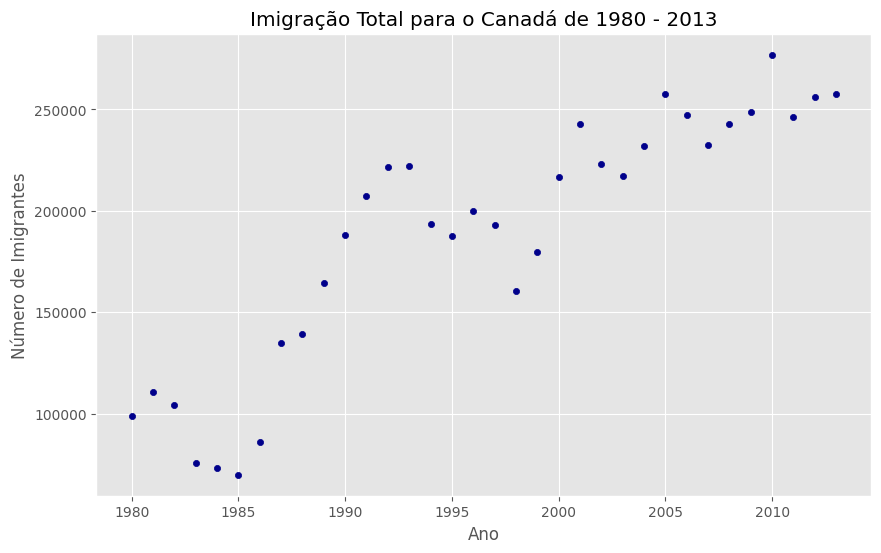

In [45]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Imigração Total para o Canadá de 1980 - 2013')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')

plt.show()

Note como o gráfico de dispersão não conecta os pontos de dados. Podemos observar claramente uma **tendência de alta** nos dados: conforme os anos passam, o número total de imigrantes aumenta.

Podemos analisar matematicamente essa tendência usando uma **linha de regressão** (linha de melhor ajuste).

In [46]:
# Definindo variáveis para regressão
x = df_tot['year']      # ano no eixo x
y = df_tot['total']     # total no eixo y

# Ajustando uma linha (polinômio de grau 1)
fit = np.polyfit(x, y, deg=1)

fit  # retorna [coeficiente angular, intercepto]

array([ 5.56709228e+03, -1.09261952e+07])

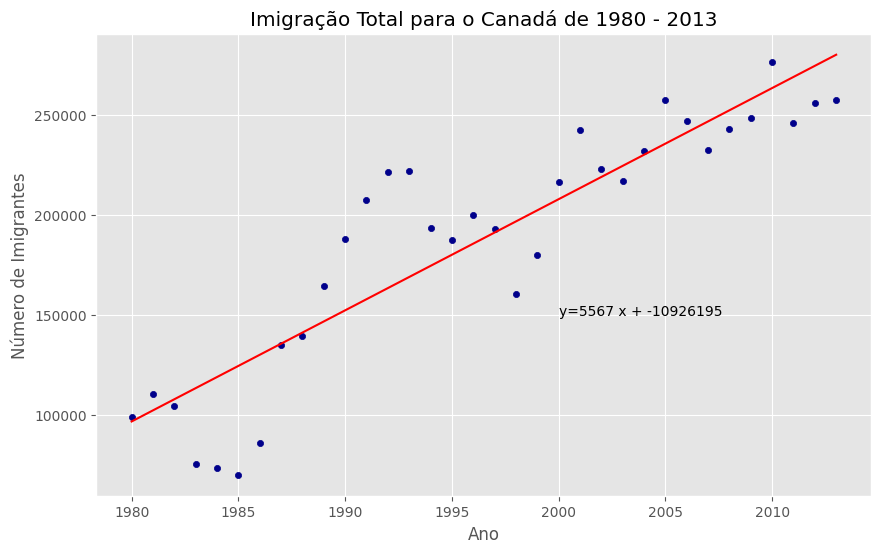

'Nº Imigrantes = 5567 * Ano + -10926195'

In [47]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Imigração Total para o Canadá de 1980 - 2013')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')

# Plotando linha de melhor ajuste
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# Imprimindo a equação da linha de melhor ajuste
'Nº Imigrantes = {0:.0f} * Ano + {1:.0f}'.format(fit[0], fit[1])

#### 8. Bubble Plots

Um **gráfico de bolhas** (bubble plot) é uma variação do gráfico de dispersão que exibe três dimensões de dados (x, y, z). Os pontos de dados são substituídos por bolhas, e o **tamanho da bolha** é determinado pela terceira variável z, também conhecida como peso.

No matplotlib, podemos passar um array ou escalar para o parâmetro `s` em `plot()`, que contém o peso de cada ponto.

In [48]:
# Transpondo o DataFrame para ter anos como linhas
df_can_t = df_can[years].transpose()

# Convertendo o índice (Anos) para tipo int
df_can_t.index = map(int, df_can_t.index)

# Nomeando o índice
df_can_t.index.name = 'Year'

# Resetando o índice para trazer o Ano como coluna
df_can_t.reset_index(inplace=True)

# Visualizando as mudanças
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,New Caledonia,San Marino,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,0,1,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Normalizando dados do Brasil (escala 0-1)
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# Normalizando dados da Argentina
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

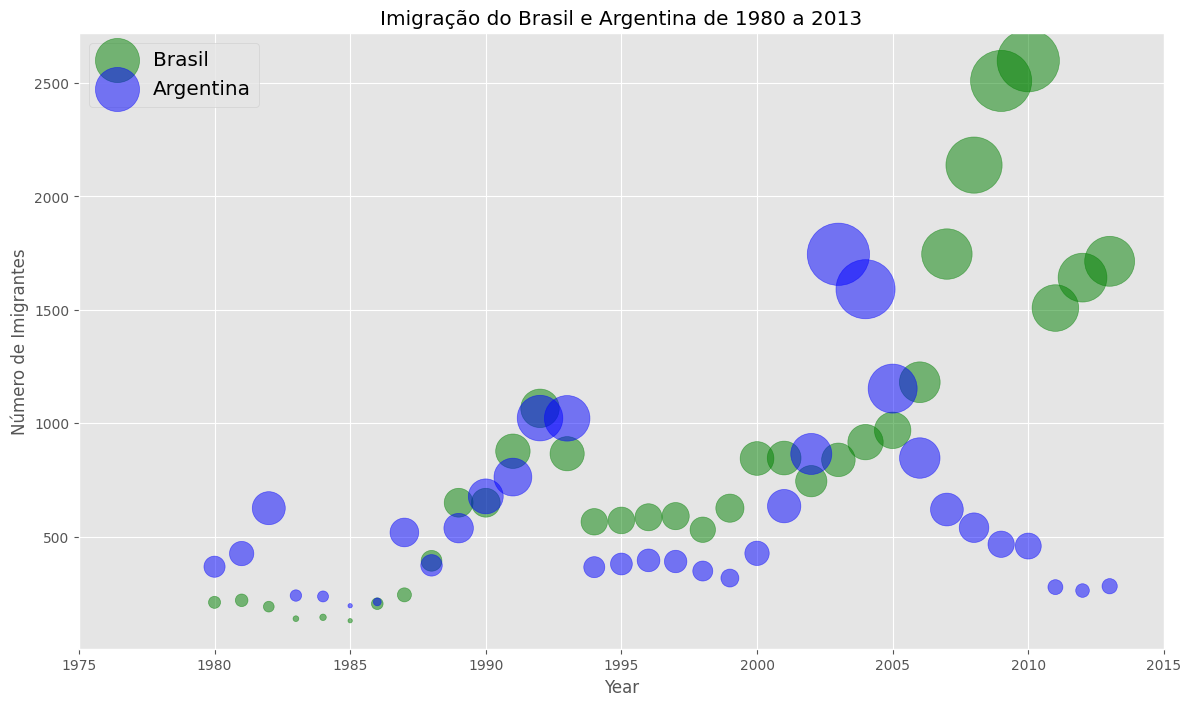

In [50]:
# Gráfico de bolhas - Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                      # transparência
                    color='green',
                    s=norm_brazil * 2000 + 10,      # tamanho das bolhas (peso normalizado)
                    xlim=(1975, 2015)
                    )

# Gráfico de bolhas - Argentina (mesmo eixo)
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0                          # usa o mesmo eixo do Brasil
                    )

ax0.set_ylabel('Número de Imigrantes')
ax0.set_title('Imigração do Brasil e Argentina de 1980 a 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

#### 9. Gráfico de Pseudo Cores

Um gráfico de pseudo cores exibe dados de matriz como um array de células coloridas (conhecidas como faces). Este gráfico é criado como uma superfície plana no plano x-y. A superfície é definida por uma grade de coordenadas x e y que correspondem aos cantos (ou vértices) das faces. A matriz C especifica as cores nos vértices. A cor de cada face depende da cor de um de seus quatro vértices circundantes. Dos quatro vértices, aquele que vem primeiro na grade x-y determina a cor da face.

Neste curso, você usa o gráfico pcolor para visualizar o conteúdo de uma tabela dinâmica que foi agrupada com base em 2 parâmetros. Esses parâmetros então representam os componentes dos eixos x e y que criam a grade. Os valores na tabela dinâmica são os valores médios de um terceiro parâmetro. Esses valores atuam como o código para a cor que a célula vai assumir.

In [51]:
plt.pcolor(C)

NameError: name 'C' is not defined

Você pode definir um argumento adicional cmap para especificar o esquema de cores do gráfico.

Dois exemplos de gráficos pcolor são mostrados abaixo, criados para os mesmos dados mas com diferentes esquemas de cores.

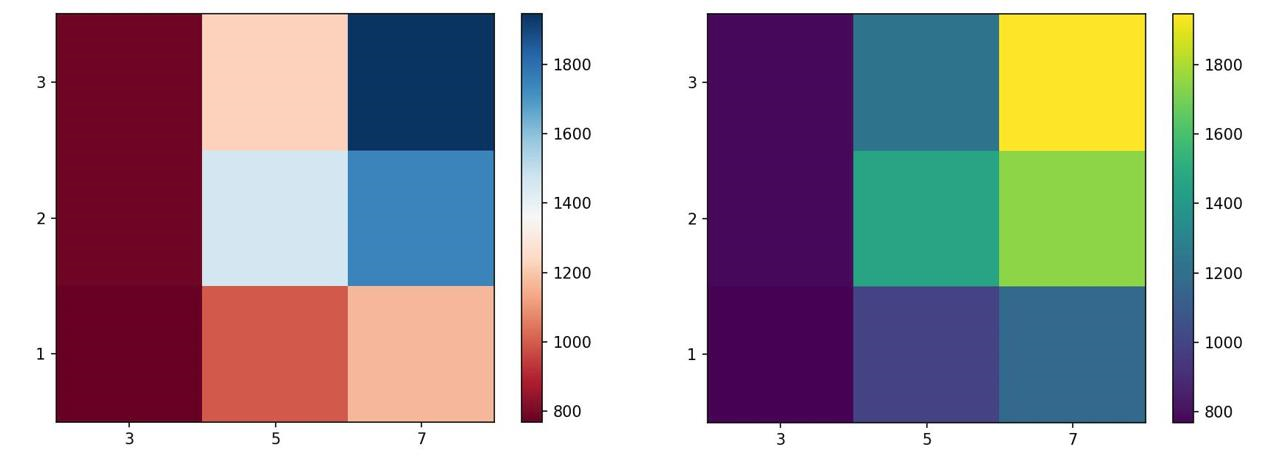

#### 10. Waffle Charts com pywaffle



Waffle charts (ou gráficos de waffle) são visualizações de dados que usam uma grade de quadrados (geralmente 10x10, totalizando 100) para representar proporções ou porcentagens de um "todo", onde cada quadrado simboliza 1% ou uma unidade, sendo coloridos para mostrar o progresso de uma meta, a composição de um grupo ou a distribuição de um valor, funcionando como uma alternativa visualmente atrativa e fácil de interpretar aos gráficos de pizza.

In [ ]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

In [ ]:
%pip install pywaffle

In [ ]:
from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, # número de linhas e colunas do waffle 
                 values = df_dsn['Total'], # dados a serem exibidos
                 cmap_name = 'tab20', # esquema de cores
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values, df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 # uso de list comprehension para criar labels a partir do índice e total do dataset
                )

plt.show()

#### 11. Word Cloud

Word clouds (ou nuvens de palavras/tags) são representações visuais de textos onde as palavras mais frequentes aparecem maiores e mais destacadas, facilitando a identificação rápida de temas e termos-chave em documentos ou conjuntos de dados textuais.

In [ ]:
%pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud importado!')

Para exemplificar o uso da biblioteca, vamos importar Alice no País das Maravilhas.

In [ ]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode('utf-8')

In [ ]:
stopwords = set(STOPWORDS)

alice_wc = WordCloud()
alice_wc.generate(alice_novel)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stopwords.add('said')  # adiciona a palavra 'said' às stopwords

# regenera a word cloud
alice_wc.generate(alice_novel)

# exibe a nuvem
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 12. Funções do Seaborn

##### 12.1. Gráfico de Regressão (`regplot`)

Um gráfico de regressão desenha um gráfico de dispersão de duas variáveis (x e y), ajusta o modelo de regressão e plota a linha de regressão resultante junto com um **intervalo de confiança de 95%**.

Os parâmetros x e y podem ser os nomes das colunas do DataFrame, e o próprio DataFrame é passado para a função.

In [ ]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

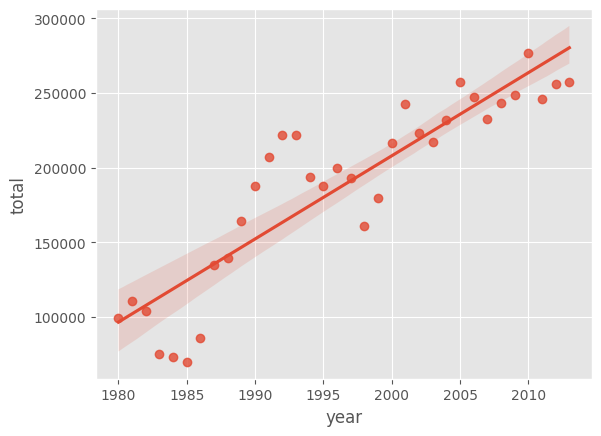

In [ ]:
sns.regplot(x='year', y='total', data=df_tot)

<Axes: xlabel='year', ylabel='total'>

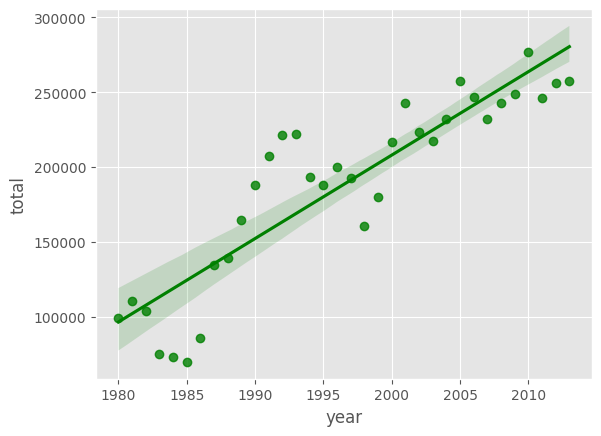

In [ ]:
sns.regplot(x='year', y='total', data=df_tot, color='green')

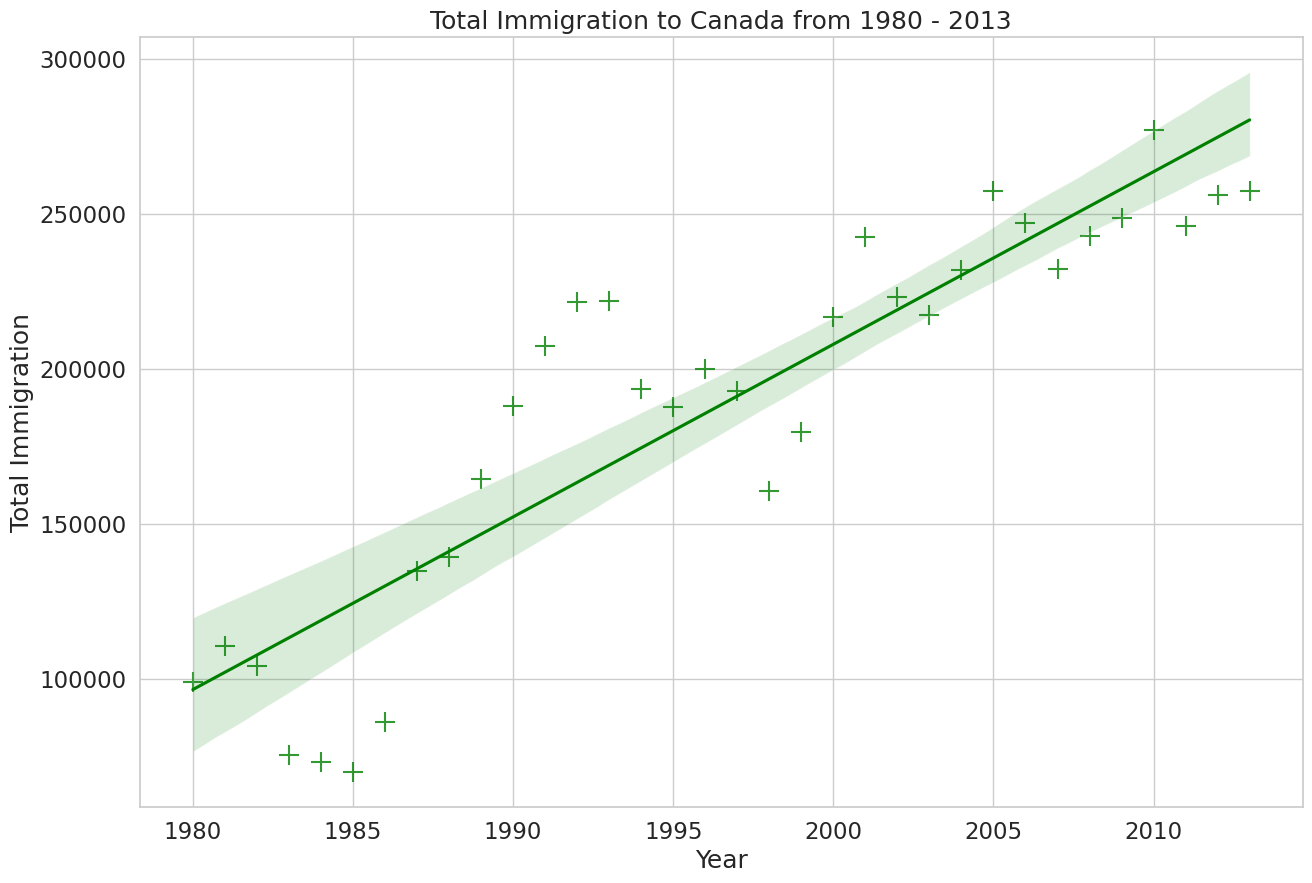

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

##### 12.2. Gráfico de Resíduos (`residplot`)

Um gráfico de resíduos é usado para exibir a **qualidade da regressão polinomial**. Esta função faz a regressão de y em x e então desenha um gráfico de dispersão dos resíduos.

**O que são resíduos?**
São as diferenças entre os valores observados (reais) e os valores previstos pelo modelo. Em outras palavras, um resíduo mede quanto uma linha de regressão "erra" verticalmente um ponto de dados.

In [ ]:
sns.residplot(data=df,x='header_1', y='header_2')

#ou

sns.residplot(x=df['header_1'], y=df['header_2'])

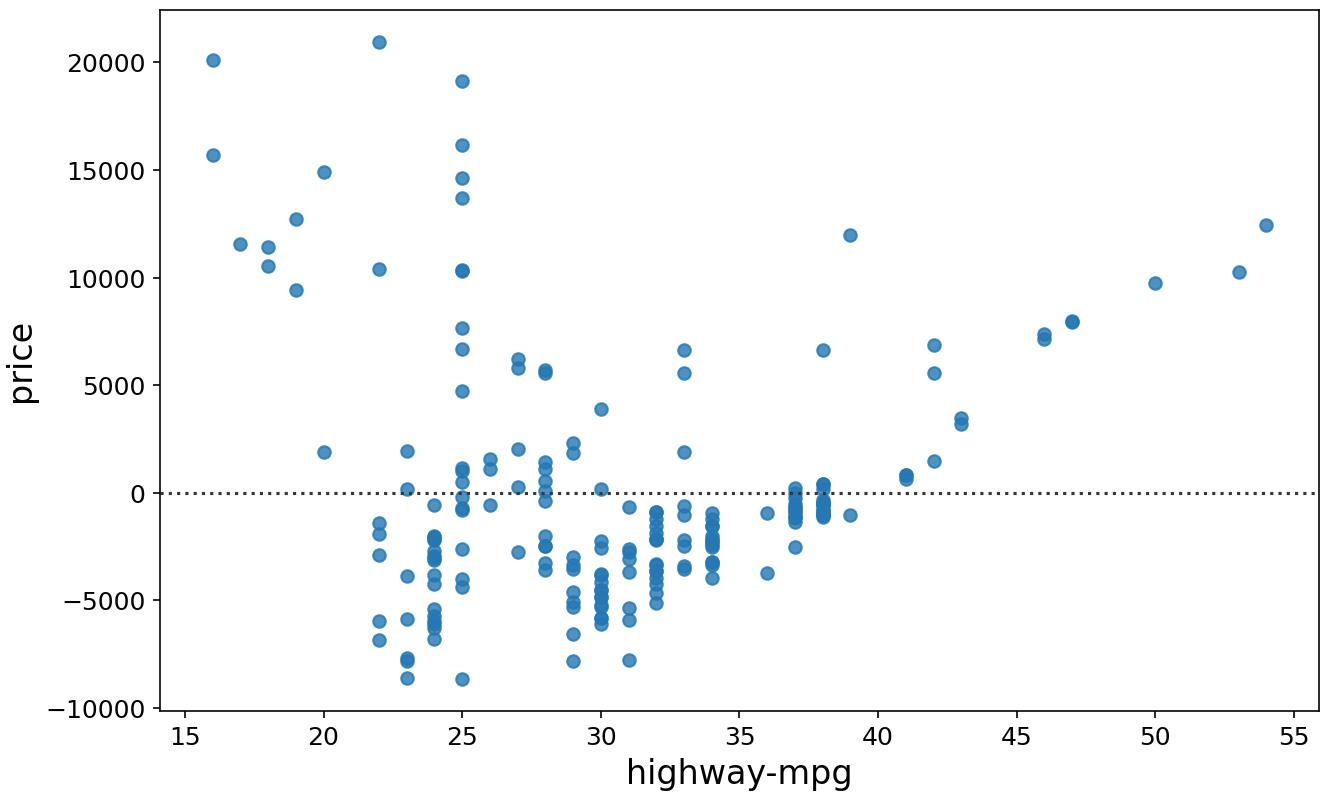

##### 12.3. Gráfico KDE (Estimativa de Densidade de Kernel)

Um gráfico KDE cria uma **curva de distribuição de probabilidade** para os dados com base em sua probabilidade de ocorrência em um valor específico. É criado para um único vetor de informações.

É usado para comparar as curvas prováveis dos dados reais com as dos dados previstos.

In [ ]:
sns.kdeplot(X)

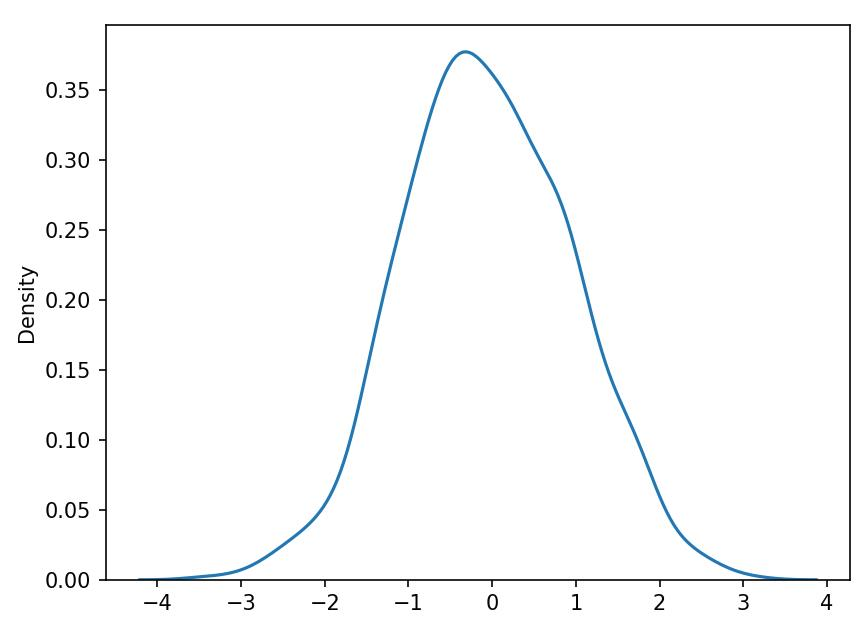

O código a seguir mostra como treinar um modelo simples de regressão linear, gerar previsões e visualizar os valores reais contra as distribuições geradas pelo gráfico KDE. Iremos usar dados sintéticos para simular uma relação linear com ruído e dividir os dados em conjuntos de teste e treino.

In [ ]:
%pip install numpy pandas seaborn matplotlib scikit-learn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


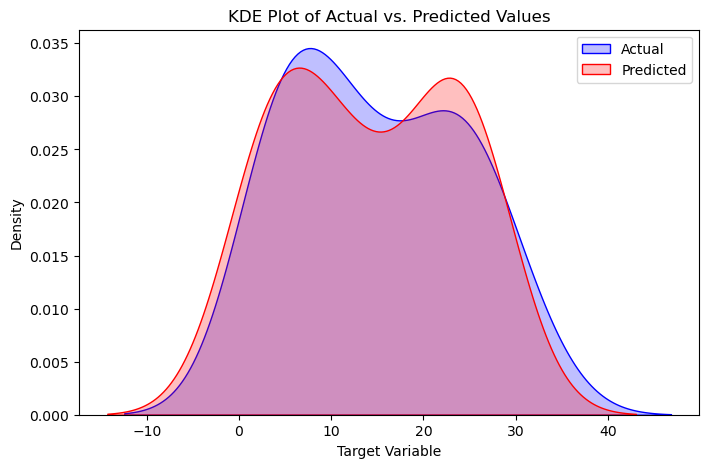

In [ ]:
import numpy as npy
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Gerando dados de exemplo
npy.random.seed(42)
x = npy.random.rand(100) * 10
y = 3 * x + npy.random.normal(0, 3, 100)  # Relação linear com ruído
data = pds.DataFrame({'X': x, 'Y': y})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)

# Treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plotando KDE para Valores Observados vs. Previstos
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Real', fill=True, color='blue')
sns.kdeplot(y_pred, label='Previsto', fill=True, color='red')
plt.xlabel('Variável Alvo')
plt.ylabel('Densidade')
plt.title('Gráfico KDE: Valores Reais vs. Previstos')
plt.legend()
plt.show()

##### 12.4. Gráfico de Distribuição (`displot`)

Este gráfico combina o **histograma e os gráficos KDE**. Ele cria a curva de distribuição usando os intervalos do histograma como referência. Você pode opcionalmente manter ou descartar o histograma.

No contexto do curso, este gráfico pode ser usado de forma intercambiável com o gráfico KDE.

In [ ]:
sns.distplot(X,hist=False)

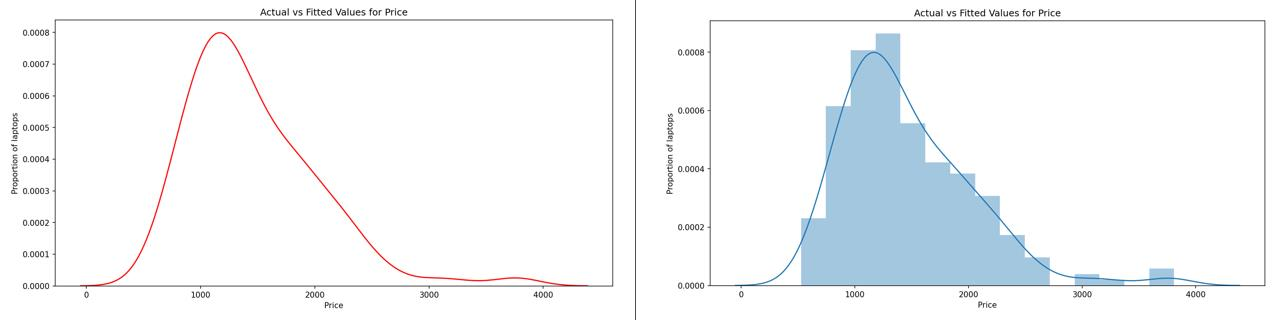

##### 12.5. Categorical Plots - Countplot e Barplot

###### 12.5.1. Countplot

Um
countplot é um tipo de gráfico de barras (colunas) usado para visualizar a contagem (frequência) de observações em cada categoria de uma variável

In [ ]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [ ]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Continent', ylabel='count'>

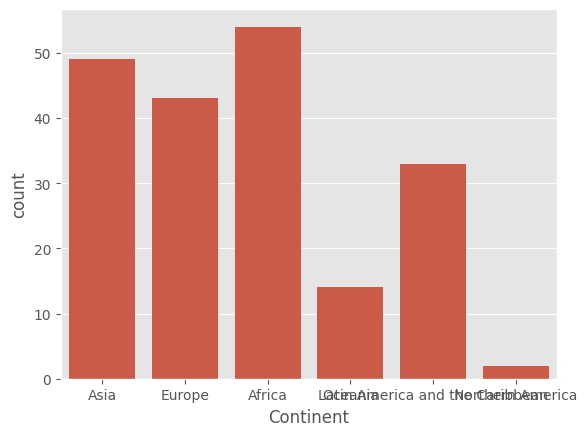

In [ ]:
import seaborn as sns

sns.countplot(x='Continent', data=df_can)

<Axes: xlabel='Continent', ylabel='count'>

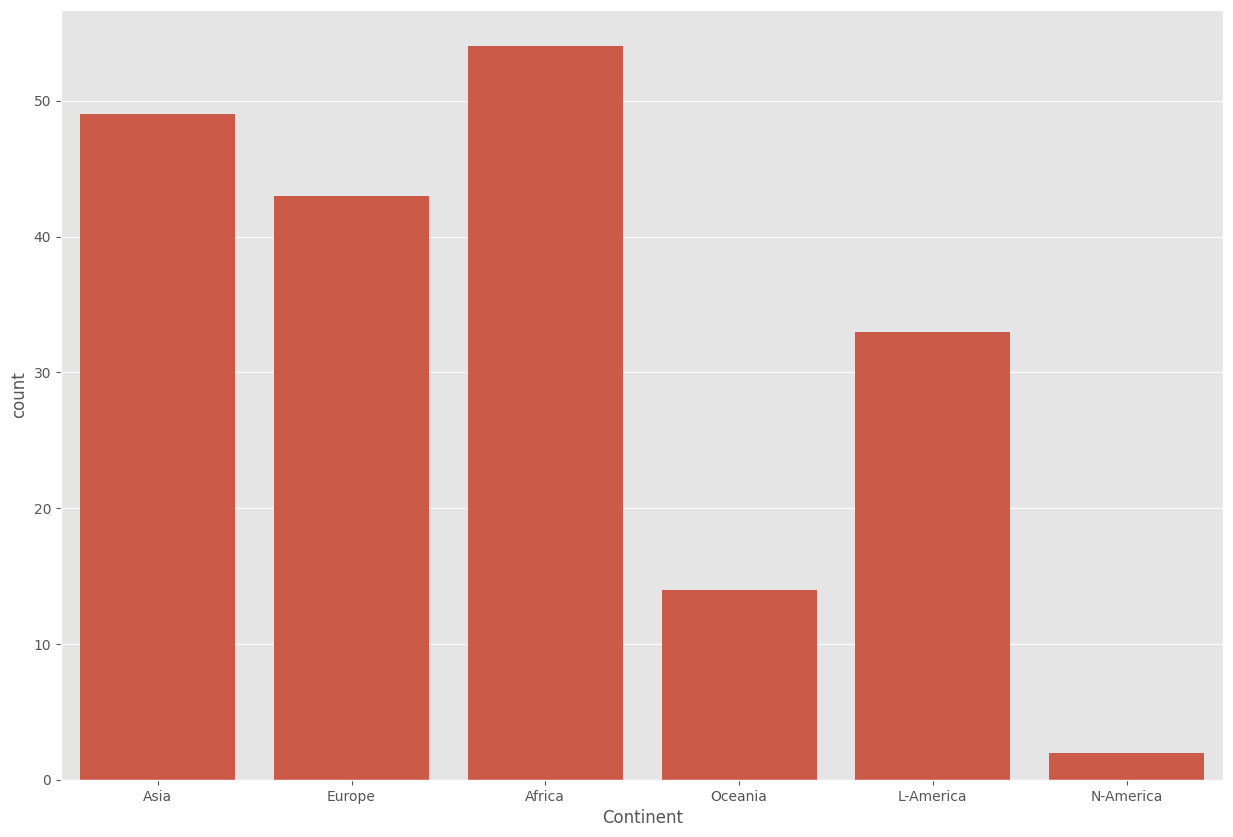

In [ ]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

###### 12.5.2. Barplot

O gráfico de barras é um gráfico com barras retangulares e comprimento proporcional aos valores que ele apresenta. As barras podem ser desenhadas na vertical ou na horizontal. 

<Axes: xlabel='Continent', ylabel='Total'>

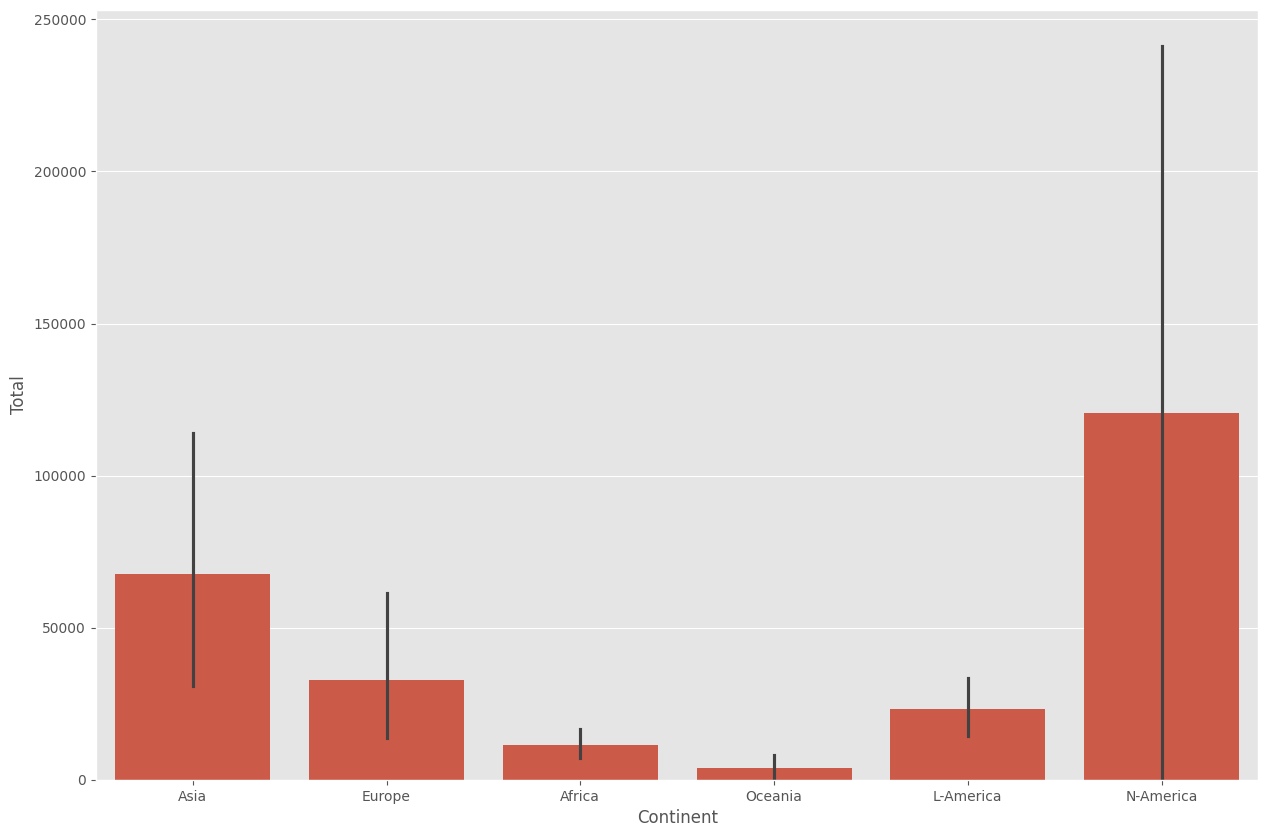

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

#### 13. Folium e criação de Mapas e visualização de dados geoespaciais

In [ ]:
%pip install folium

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.7 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.7 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (37 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Using cached 

In [ ]:
import folium

world_map = folium.Map()

world_map

In [ ]:
# Coordenadas do centro geográfico do Brasil
brasil = folium.Map(
    location=[-14.235, -51.925],  # latitude, longitude
    zoom_start=4  # zoom para ver o país inteiro
    #titles aplica estilo. Stamen Terrain e Stamen Toner
)

brasil

In [ ]:
folium.Marker(location=[-14.235, -51.925], popup='Centro do Brasil').add_to(brasil)

##### 13.1 Mapa coroplético (Choropleth map)

Mapa coroplético ou mapa coropleto é um tipo de mapa temático: um mapa coroplético representa normalmente uma superfície estatística por meio de áreas simbolizadas com cores, sombreamentos ou padrões de acordo com uma escala que representa a proporcionalidade da variável estatística em causa, como por exemplo a densidade populacional ou o rendimento per capita.

In [ ]:
# Recarregando o dataset de imigração do Canadá
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Dados baixados e lidos em um DataFrame!')

Data downloaded and read into a dataframe!


In [54]:
print(df_can.shape)

(195, 39)


Para criar um mapa coroplético, precisamos de um arquivo GeoJSON que defina as áreas/fronteiras do estado, município ou país que nos interessa. No nosso caso, como estamos criando um mapa mundial, queremos um GeoJSON que defina as fronteiras de todos os países do mundo. Para sua conveniência, forneceremos este arquivo, então vamos baixá-lo. Vamos nomeá-lo como world_countries.json.

In [ ]:
# Baixando o arquivo GeoJSON com as fronteiras dos países
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('Arquivo GeoJSON baixado!')

GeoJSON file downloaded!


In [63]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

E agora, para criar um mapa coroplético, usaremos o método `Choropleth` com os seguintes parâmetros principais:

| Parâmetro | Descrição |
|-----------|-----------|
| `geo_data` | O arquivo GeoJSON |
| `data` | O DataFrame contendo os dados |
| `columns` | As colunas do DataFrame que serão usadas para criar o mapa coroplético |
| `key_on` | A chave ou variável no arquivo GeoJSON que contém o nome da variável de interesse. Para determinar isso, você precisará abrir o arquivo GeoJSON usando qualquer editor de texto e anotar o nome da chave que contém o nome dos países (já que os países são nossa variável de interesse). Neste caso, `name` é a chave no arquivo GeoJSON que contém o nome dos países. **Nota:** Esta chave é *case-sensitive*, então você precisa passar exatamente como ela existe no arquivo GeoJSON |
| `fill_color` | Esquema de cores do mapa (ex: 'YlOrRd' = Amarelo-Laranja-Vermelho) |
| `fill_opacity` | Opacidade do preenchimento (0-1) |
| `line_opacity` | Opacidade das linhas de fronteira (0-1) |
| `legend_name` | Nome da legenda do mapa |

In [64]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)

# display map
world_map